In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C:\Users\Melora Rego\OneDrive\Desktop\internship\tsk2\Top-100 Trending Books.csv')
data

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...
...,...,...,...,...,...,...,...,...
95,96,First Little Readers Parent Pack: Guided Readi...,11.40,4.7,Deborah Schecter,2010,Nonfiction,amazon.com/First-Little-Readers-Parent-Pack/dp...
96,97,Hatchet,5.14,4.7,Gary Paulsen,1987,"young adult novel, adventure novel, survival ...",amazon.com/Hatchet-Gary-Paulsen/dp/1416936475/...
97,98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",15.30,4.5,David Grann,2023,Nonfiction,amazon.com/Wager-Tale-Shipwreck-Mutiny-Murder/...
98,99,"I'm Dead, Now What?: Important Information Abo...",12.99,4.6,Peter Pauper Press,2015,Nonfiction,amazon.com/Important-Information-Belongings-Bu...


In [4]:
data.isnull().sum()

Rank                   0
book title             0
book price             0
rating                 3
author                 0
year of publication    0
genre                  0
url                    0
dtype: int64

In [5]:
#filled the null value with mean of the column
data['rating']=data['rating'].fillna(data['rating'].mean())

In [6]:
data.isnull().sum()

Rank                   0
book title             0
book price             0
rating                 0
author                 0
year of publication    0
genre                  0
url                    0
dtype: int64

In [7]:
data.describe()

,Rank,book price,rating,year of publication
count,100.000000,100.000000,100.000000,100.00000
mean,50.500000,12.708600,4.689691,2013.76000
std,29.011492,7.915568,0.178368,15.13049
min,1.000000,2.780000,4.100000,1947.00000
25%,25.750000,6.302500,4.600000,2014.00000
50%,50.500000,11.480000,4.700000,2019.00000
75%,75.250000,16.990000,4.800000,2023.00000
max,100.000000,48.770000,5.000000,2024.00000


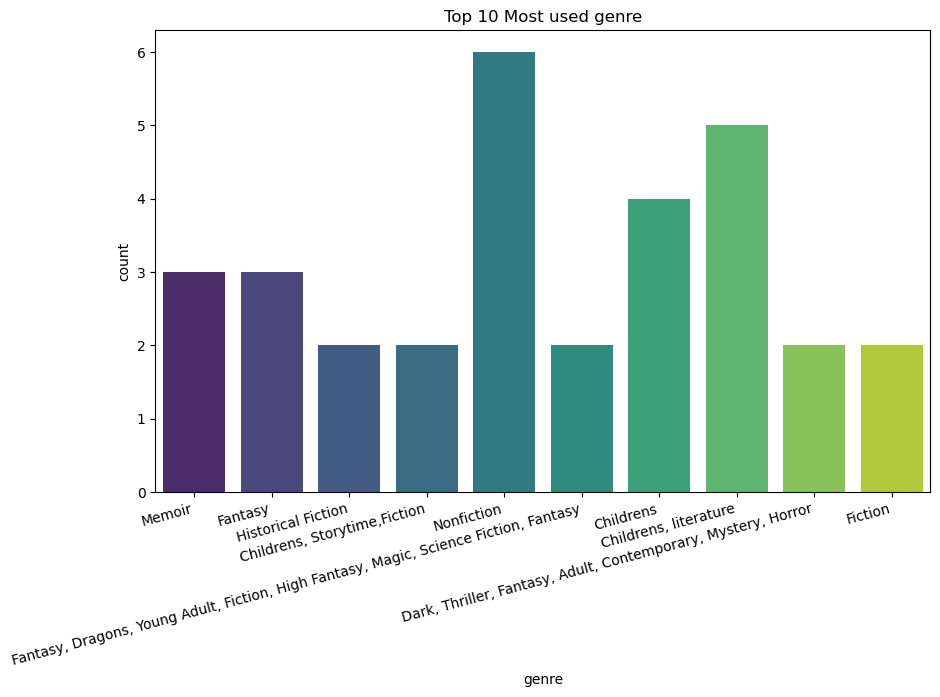

In [8]:
top_genres = data['genre'].value_counts().nlargest(10)  # Top 10 most used categories
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=data[data['genre'].isin(top_genres.index)],palette='viridis')
plt.xticks(rotation=15, ha="right")  # Rotate labels to the right
plt.title('Top 10 Most used genre')
plt.show()

In [9]:
data['author'].value_counts()

Sarah J. Maas          5
Adam Wallace           3
Rebecca Yarros         2
Suzanne Collins        2
Lucy Score             2
                      ..
David Brooks           1
Don Miguel Ruiz        1
Melissa Sweet          1
Christopher Paolini    1
Craig Smith            1
Name: author, Length: 85, dtype: int64

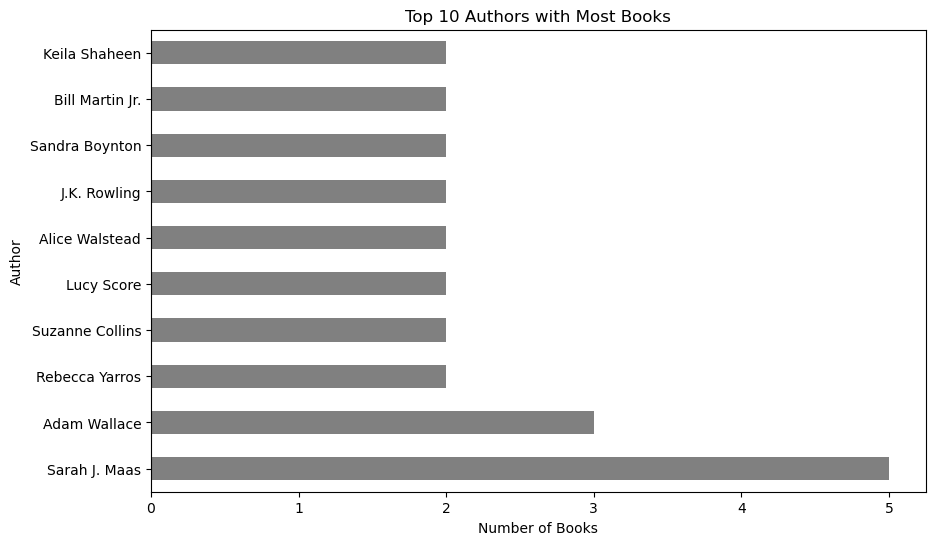

In [10]:
author_counts = data['author'].value_counts()
plt.figure(figsize=(10, 6))
author_counts[:10].plot(kind='barh', color='gray')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

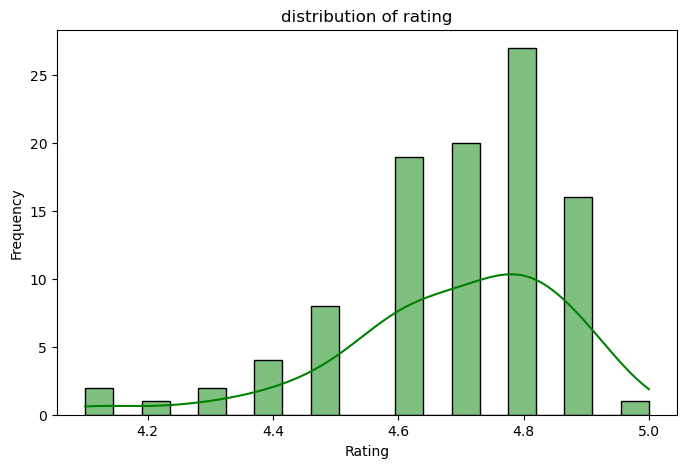

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=20, kde=True,color='green')
plt.title('distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


the above graph the distribution is skewed to the left. This means there are more ratings on the higher end (positive) and fewer ratings on the lower end (negative).

In [12]:
numeric_columns =['rating','book price']
correlation_matrix = data[numeric_columns].corr()

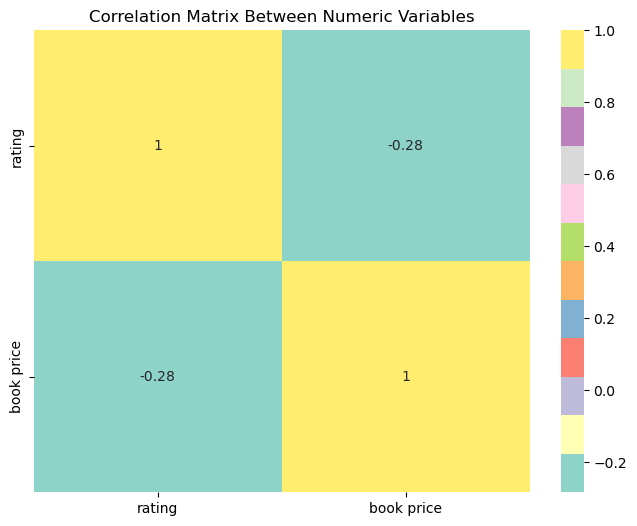

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set3')
plt.title('Correlation Matrix Between Numeric Variables')
plt.show()

The above matrix shows a positive correlation between book price and rating. This means that there is a tendency for books with higher prices to also have higher ratings.